## Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)

In [2]:
df=pd.read_csv('Bank_marketing.csv')

In [3]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### Applying info() to get insights on our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Applying describe() to get statistical insights on our dataframe

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Visualize and explore dataset

<AxesSubplot:>

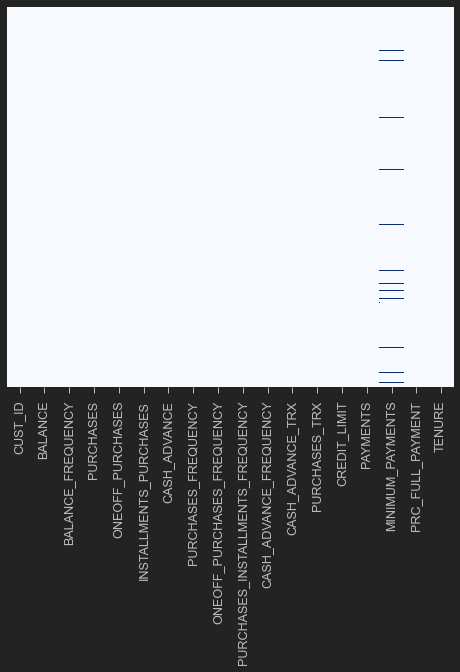

In [6]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### filling up the missing elements with mean of the 'MINIMUM_PAYMENT'

In [8]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### filling up the missing elements with mean of the 'CREDIT_LIMIT'

In [10]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

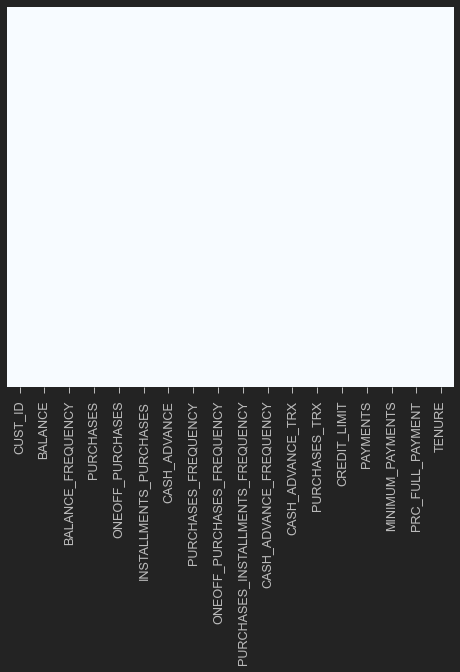

In [11]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

#### Chequing for duplicates

In [12]:
df.duplicated().sum()

0

#### Dropping 'CUST_ID' column as it does not provide any valuable information

In [13]:
df.drop('CUST_ID',axis=1,inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Plotting each feature to visualize the probability density of a continuous varaiable

C:\tools\Anaconda3\envs\credit-card-clustering\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\envs\credit-card-clustering\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\envs\credit-card-clustering\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

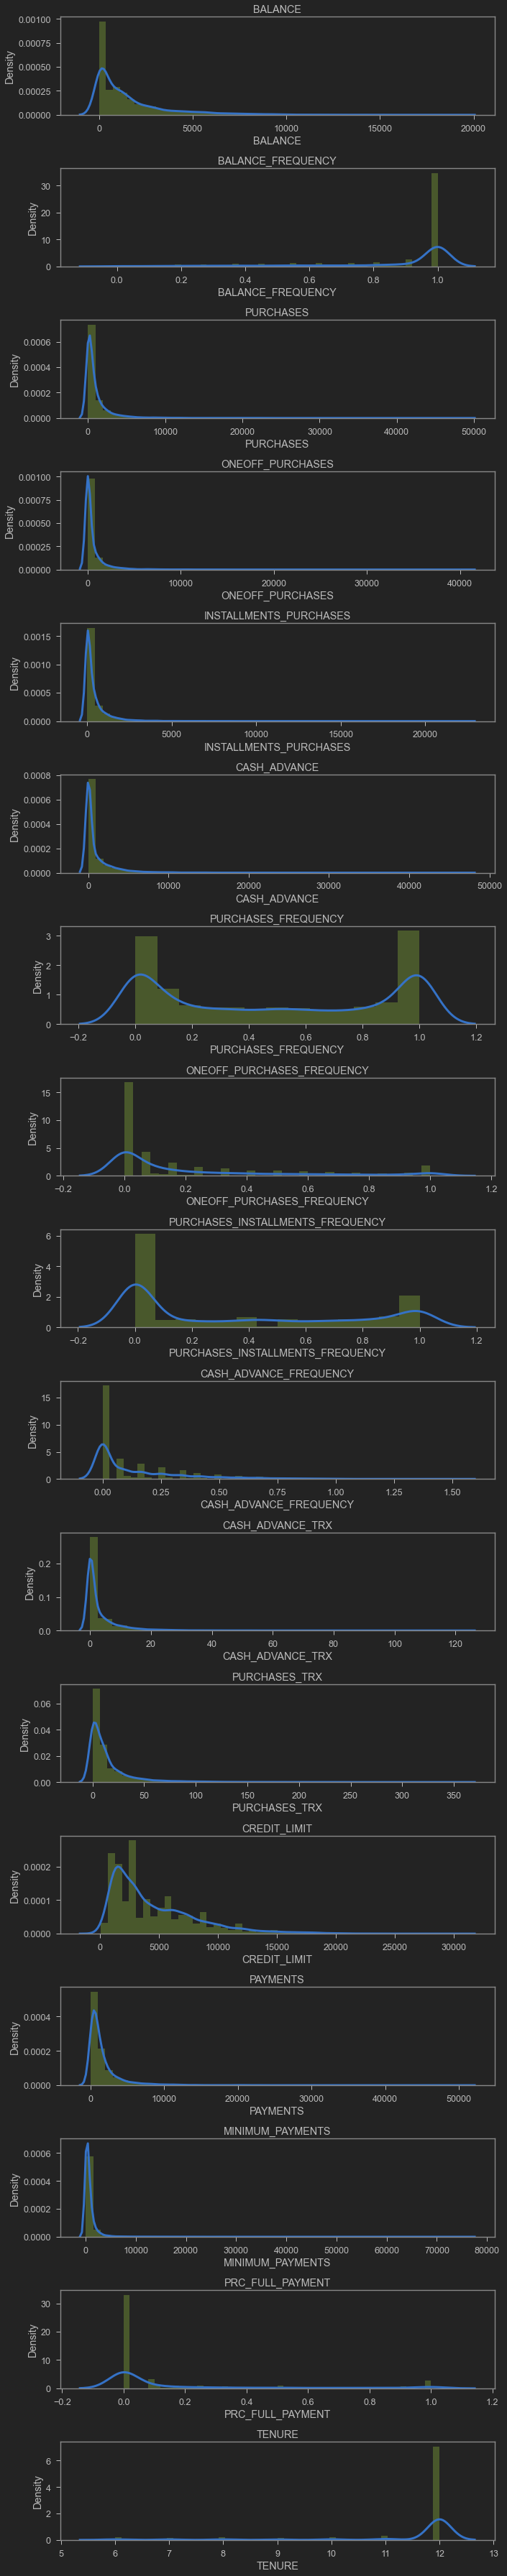

In [14]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"b","lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(df.columns[i])

plt.tight_layout()

### Plotting the correlation matrix between features

<AxesSubplot:>

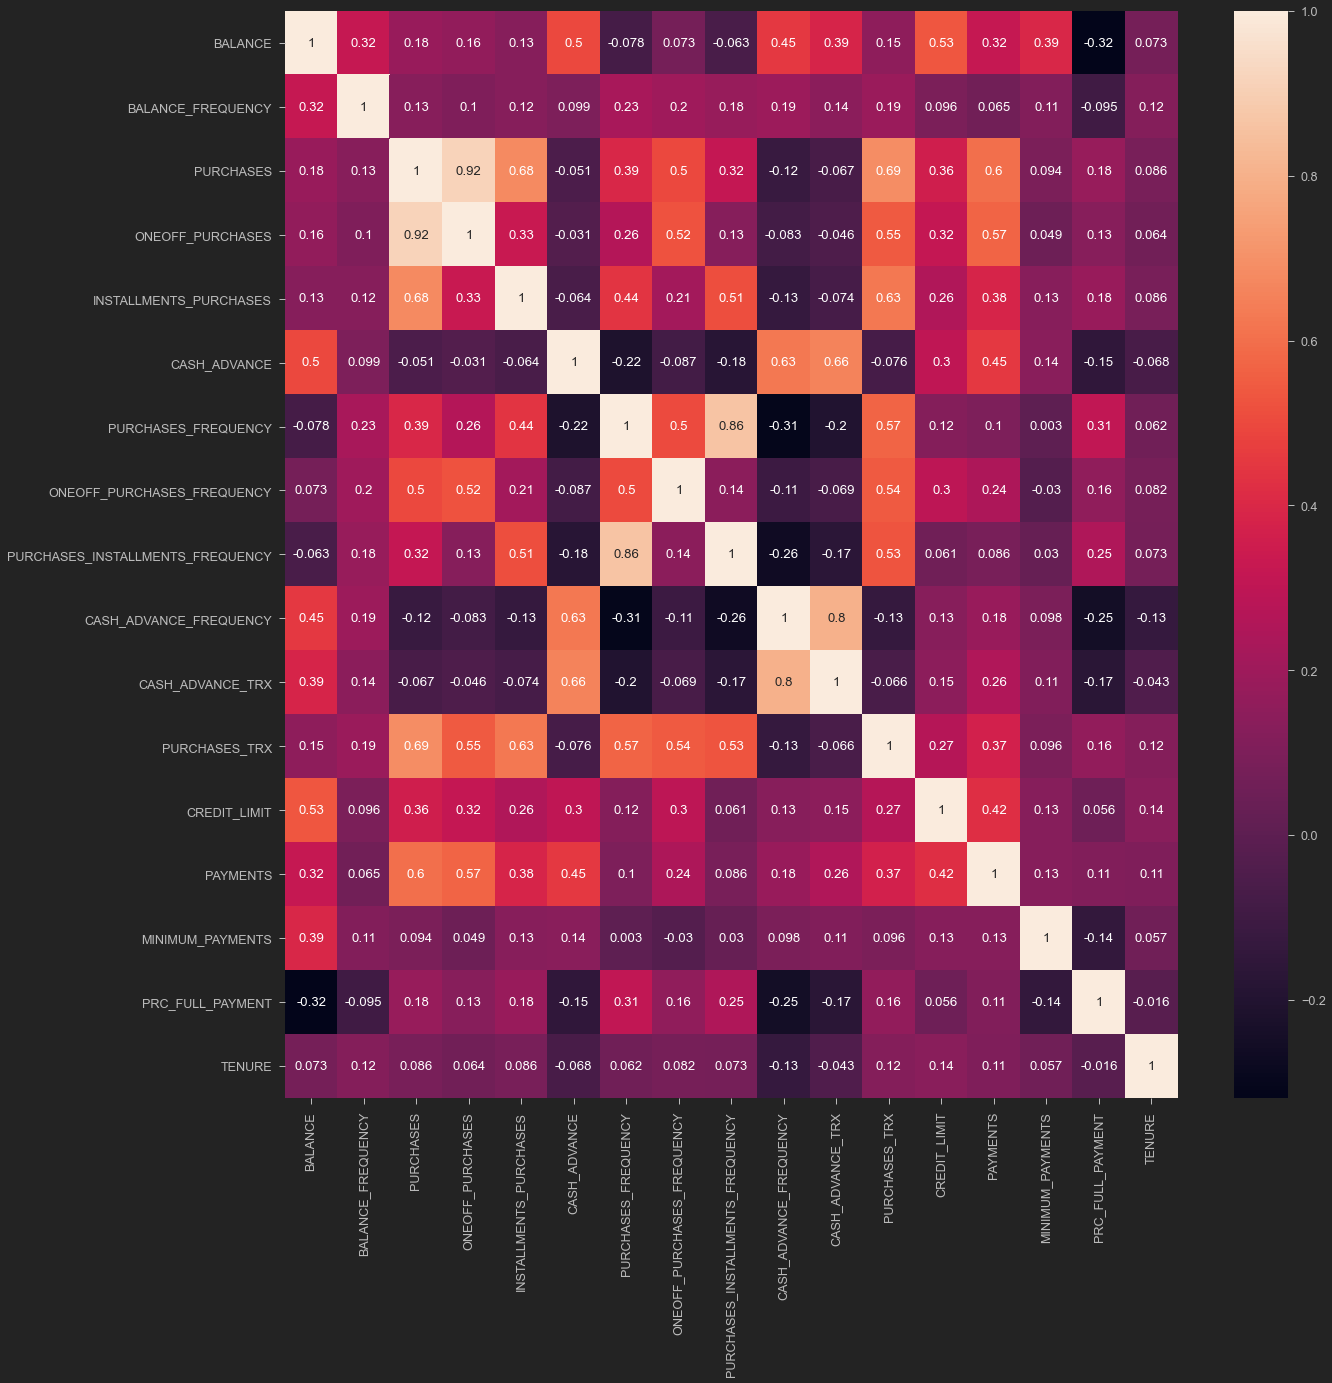

In [15]:
correlation=df.corr()
f, ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True)

## Finding the optimal number of clusters using the "Elbow method"

### Scaling and transforming the data

In [16]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [17]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [18]:
df_scaled.shape

(8950, 17)

### The "Elbow Method"

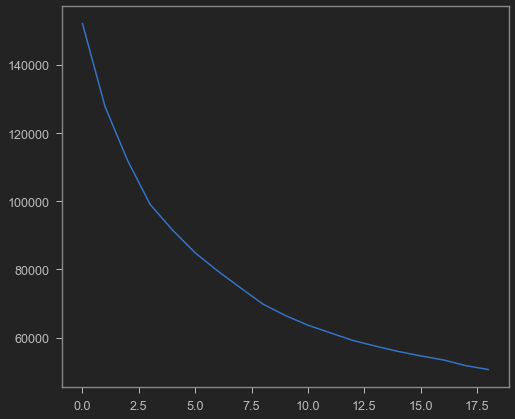

In [19]:
scores=[]
range_val=range(1,20)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')


### From the graph we can see that the "Elbow" seems to be forming around the 4th cluster.
### Also, the values does not reduce linearity until the 7th or 8th cluster.
### We will choose 7 clusters

## Applying K-means method

In [20]:
kmeans=KMeans(7)
kmeans.fit(df_scaled)
labels=kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(7, 17)

In [22]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  1.674016          0.394581  -0.212526        -0.149305   
1  0.018110          0.403866  -0.349443        -0.229825   
2 -0.335022          0.355739   0.033986        -0.086385   
3 -0.701543         -2.133587  -0.305982        -0.230503   
4  0.531820          0.454536   1.802818         1.546058   
5 -0.341141         -0.333100  -0.280989        -0.207459   
6  1.923051          0.337717  11.212042        10.600367   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.228283     2.000968           -0.451893   
1              -0.403908    -0.094177           -0.839819   
2               0.238887    -0.369447            0.976483   
3              -0.299905    -0.324030           -0.537637   
4               1.422286    -0.238935            1.151771   
5              -0.282905     0.060232           -0.171997   
6               7.033118     0.419625            1.046983   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.173369                        -0.410813   
1                  -0.367591                        -0.763863   
2                   0.201746                         0.893360   
3                  -0.436587                        -0.427520   
4                   1.790135                         0.968731   
5                  -0.271368                        -0.207953   
6                   1.915501                         0.981334   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.911225         1.920886     -0.254927     1.019325   
1               0.102425        -0.029251     -0.474527    -0.298996   
2              -0.472008        -0.360389      0.232939    -0.143116   
3              -0.523134        -0.377605     -0.414550    -0.175050   
4              -0.350796        -0.261536      2.106880     1.120891   
5               0.291927        -0.007982     -0.379541    -0.560480   
6              -0.258912         0.061229      5.362438     3.044064   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.814791         0.548169        -0.391736  0.072434  
1 -0.245153        -0.010780        -0.455883  0.272643  
2 -0.178293        -0.071478         0.329518  0.271795  
3 -0.200441        -0.257489         0.288170  0.200378  
4  0.974363         0.206485         0.467137  0.310091  
5 -0.389957        -0.207857         0.021533 -3.178761  
6  8.098975         1.120318         1.110132  0.310863

### Aplying inverse trasnformation to understand the numbers

In [23]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  5048.798837          0.970743    549.139966       344.621222   
1  1602.169285          0.972943    256.615370       210.974770   
2   867.155271          0.961542   1075.815678       449.055146   
3   104.272448          0.371844    349.469265       209.849357   
4  2671.412666          0.984946   4854.953568      3158.576248   
5   854.418008          0.798362    402.868166       248.098605   
6  5567.142164          0.957273  24957.905000     18186.875667   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             204.633756  5174.995239            0.308984   
1              45.818358   781.378168            0.153290   
2             627.090521   204.124191            0.882260   
3             139.867654   299.364326            0.274571   
4            1697.223583   477.814019            0.952612   
5             155.239781  1105.181375            0.421320   
6            6771.029333  1858.844605            0.910556   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.150738                         0.201170   
1                   0.092798                         0.060859   
2                   0.262642                         0.719482   
3                   0.072215                         0.194530   
4                   0.736490                         0.749436   
5                   0.121503                         0.281791   
6                   0.773889                         0.754444   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.517600        16.357466      8.373303   8203.172563   
1               0.155640         3.049210      2.914871   3406.579262   
2               0.040691         0.789435     20.499815   3973.733829   
3               0.030460         0.671953      4.405676   3857.545446   
4               0.064946         1.464034     67.078984   8572.708039   
5               0.193562         3.194357      5.275862   2455.195062   
6               0.083333         3.666667    148.000000  15570.000000   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   4091.883471      2141.692129         0.039139  11.614253  
1   1023.449521       839.083514         0.020377  11.882184  
2   1217.001944       697.629244         0.250093  11.881049  
3   1152.887104       264.138375         0.238000  11.785476  
4   4553.828271      1345.412098         0.290344  11.932299  
5    604.255929       379.804248         0.160013   7.263323  
6  25178.882690      3475.059479         0.478409  11.933333

In [24]:
# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (Revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

### Cocatenating the clusters labels to our original DataFrame

In [25]:
df_cluster=pd.concat([df,pd.DataFrame({'CLUSTER':labels})], axis=1)
df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

### Plot the histogram of various clusters 

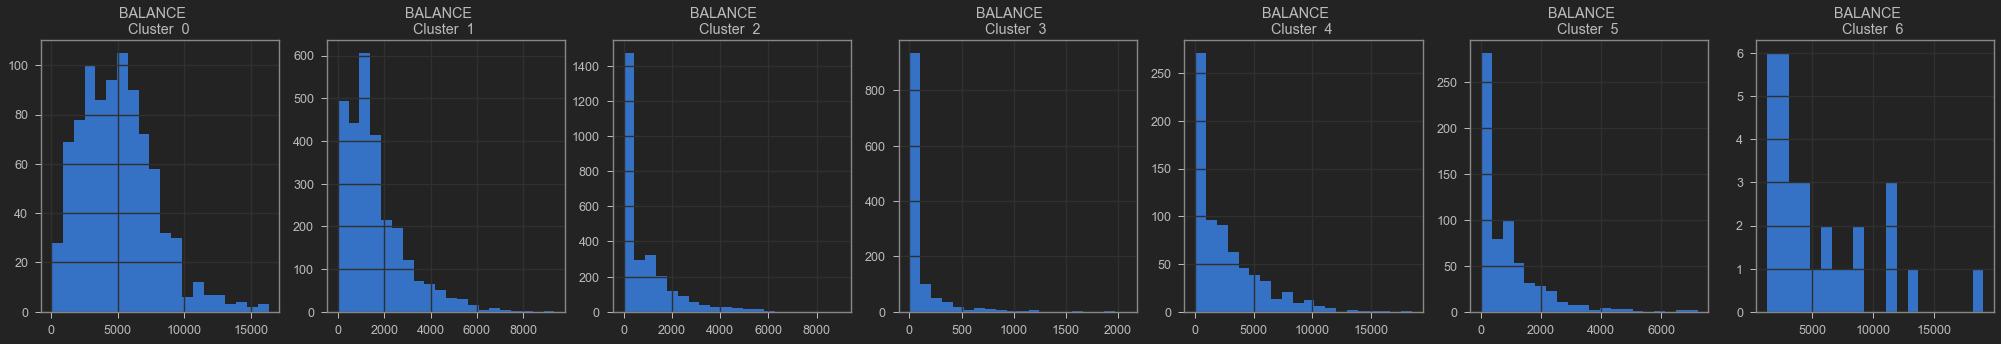

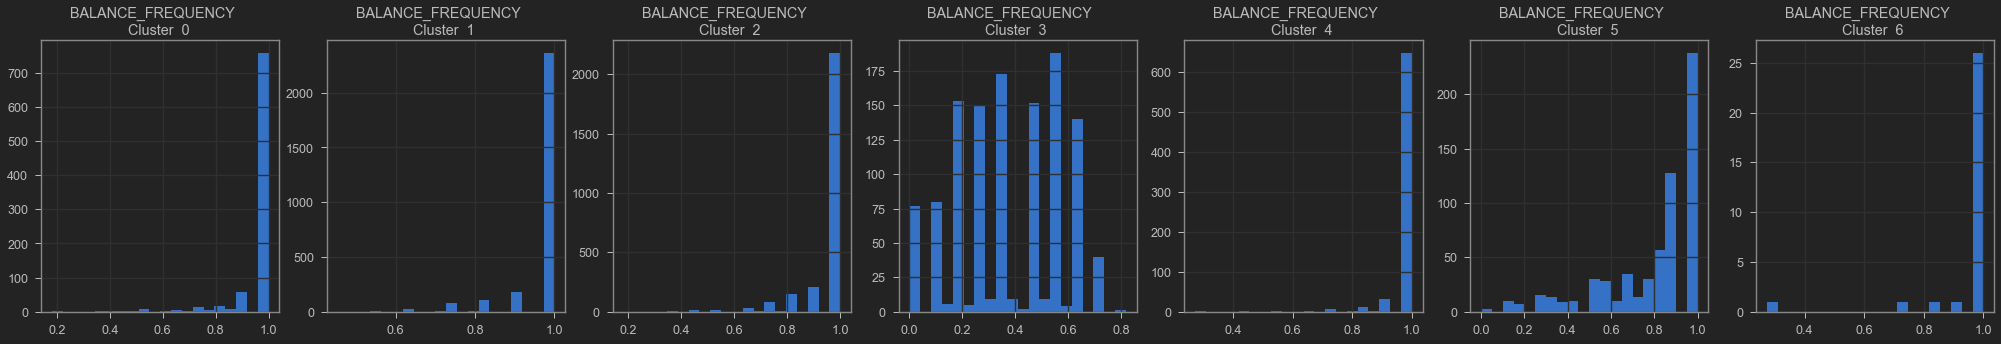

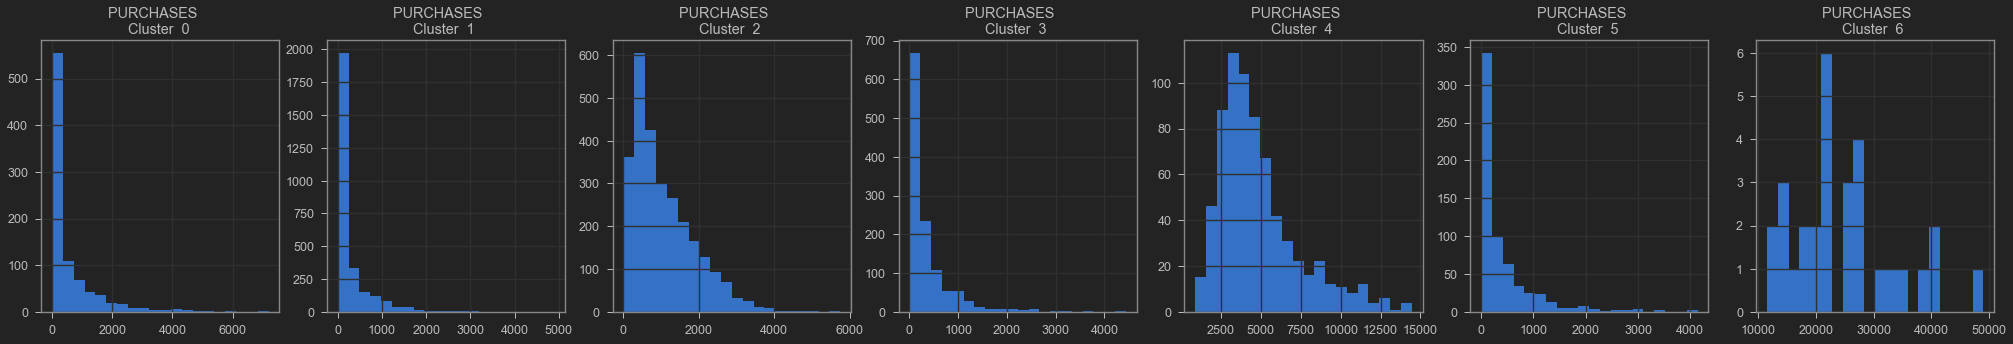

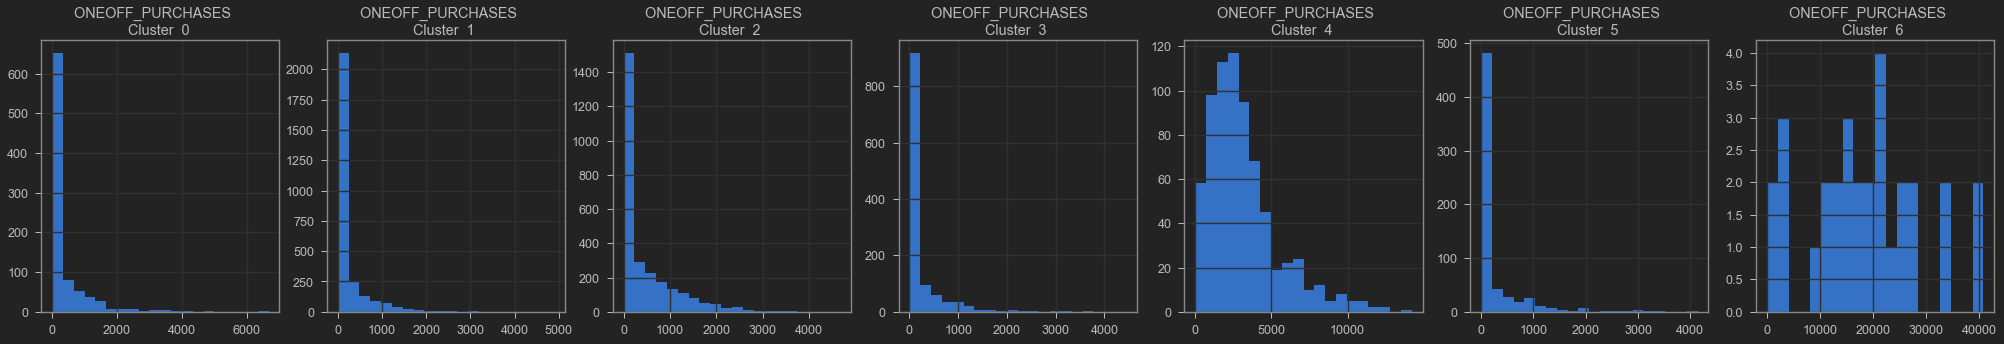

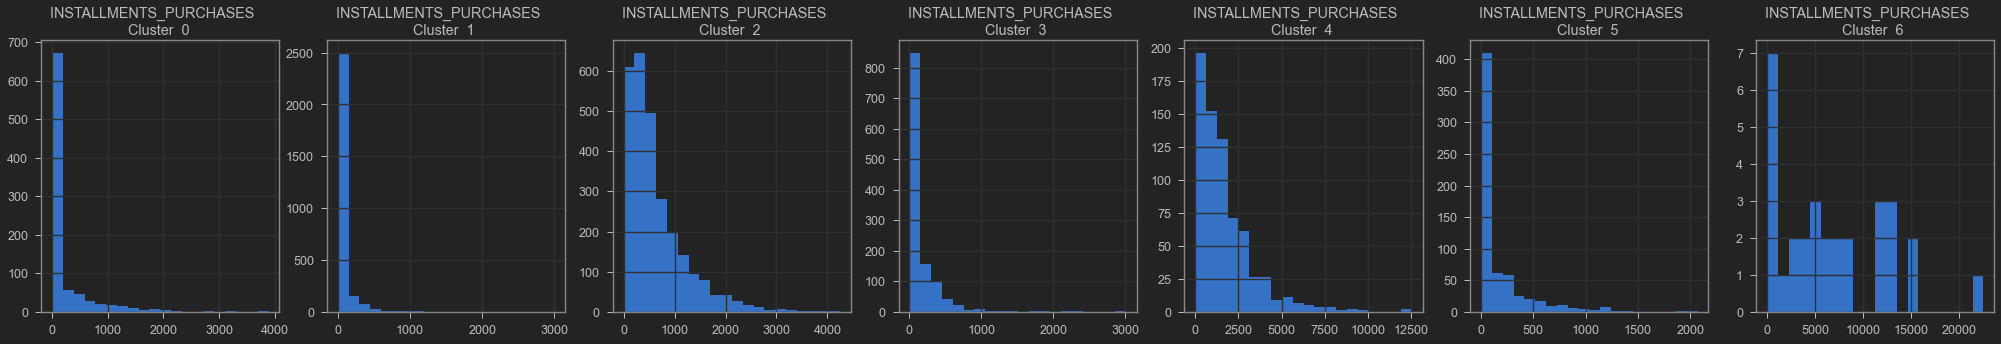

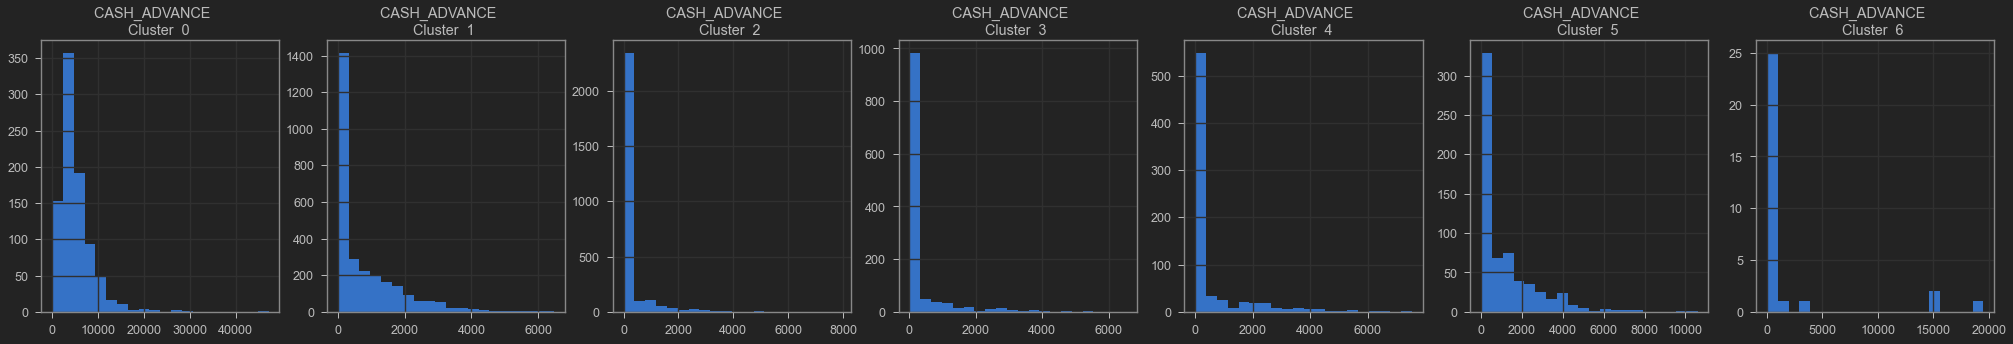

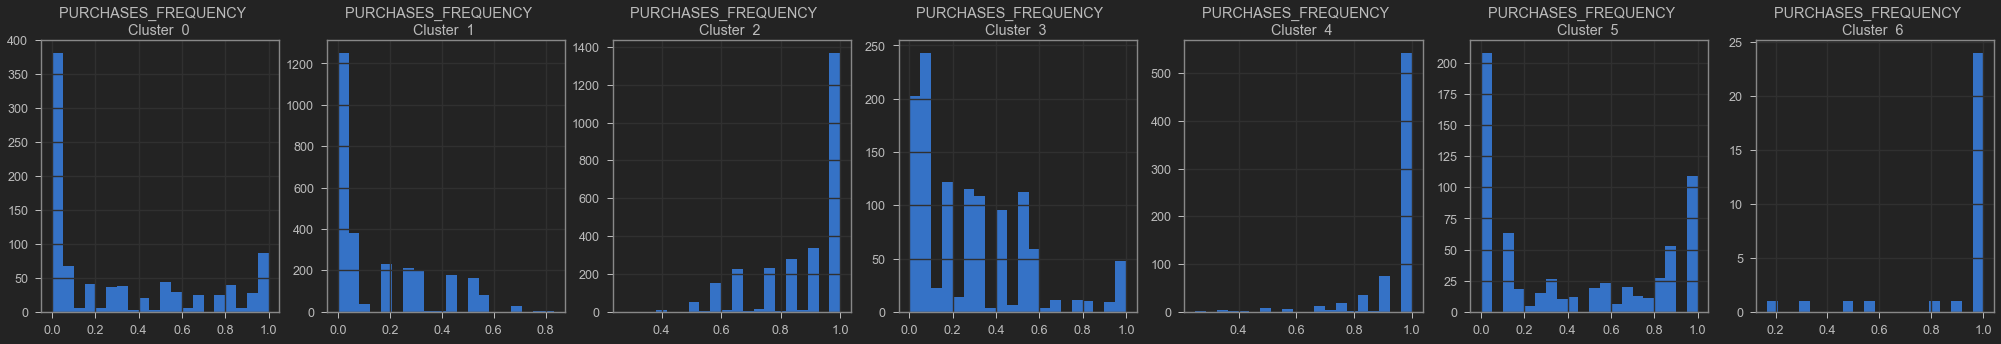

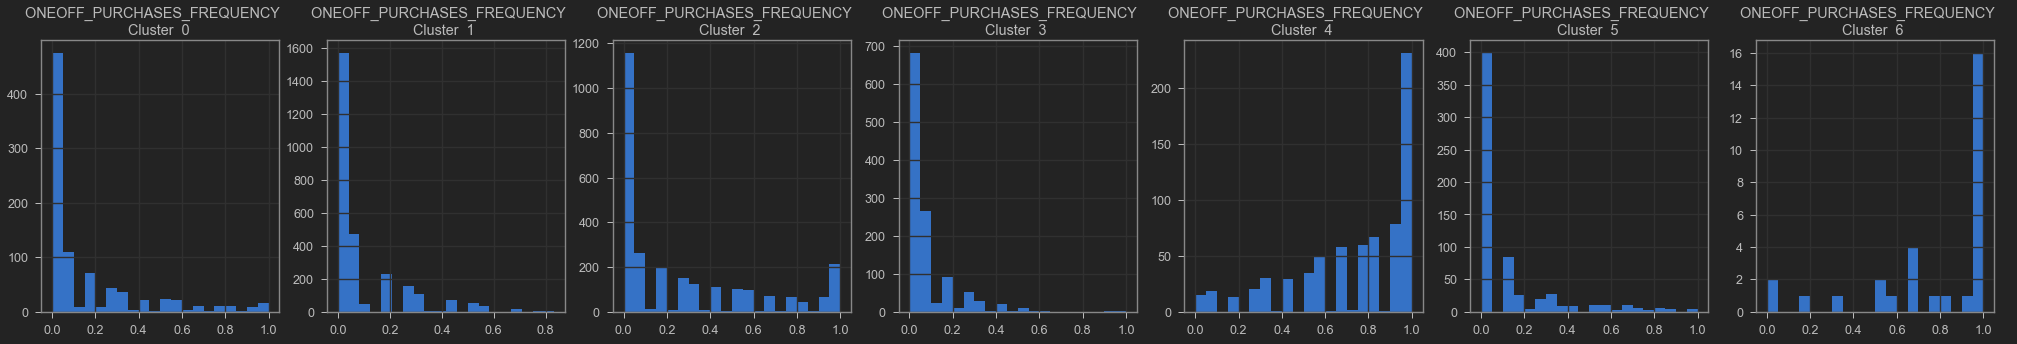

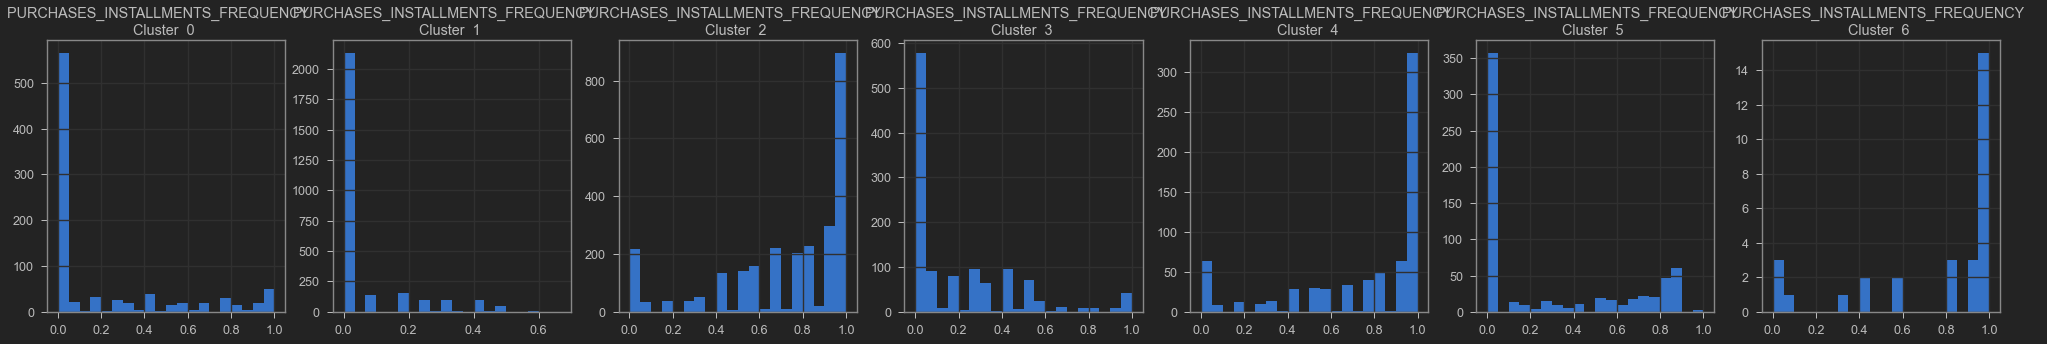

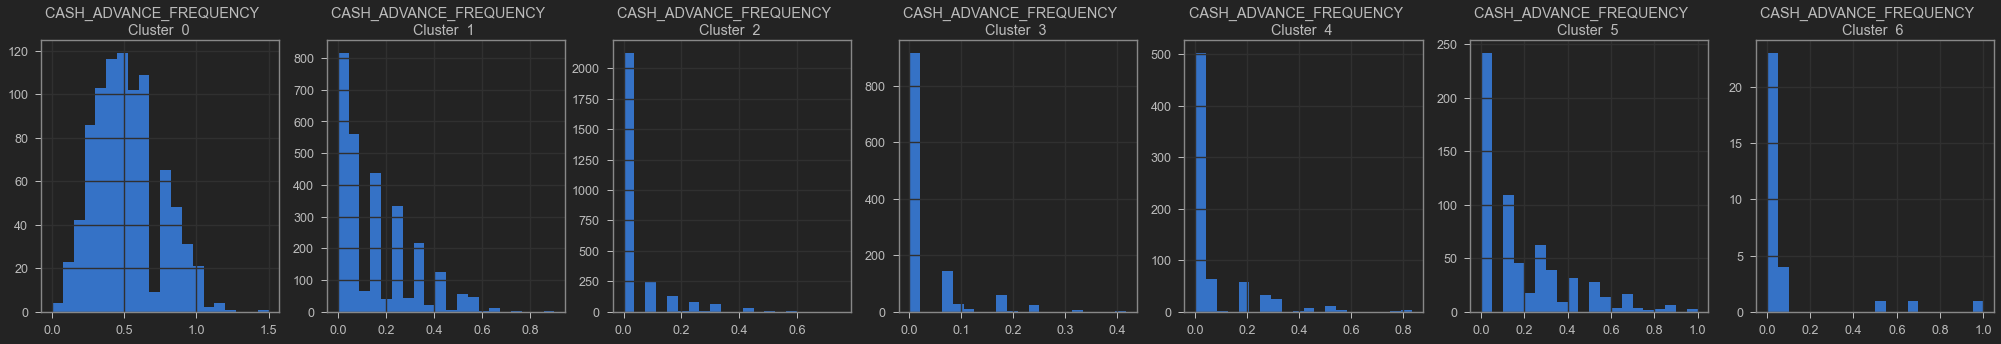

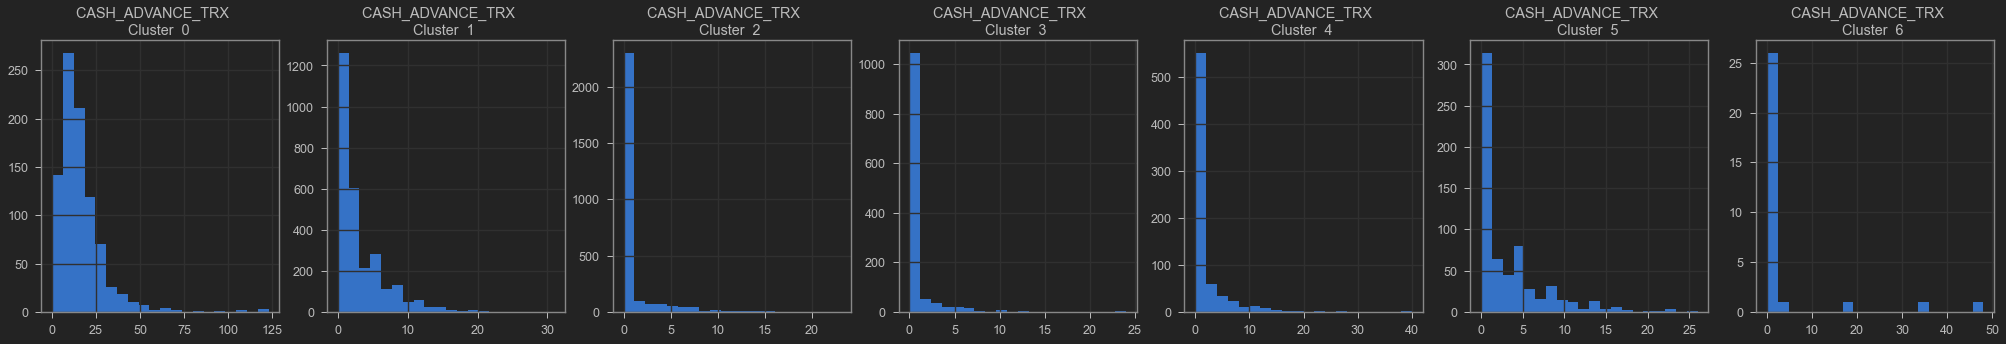

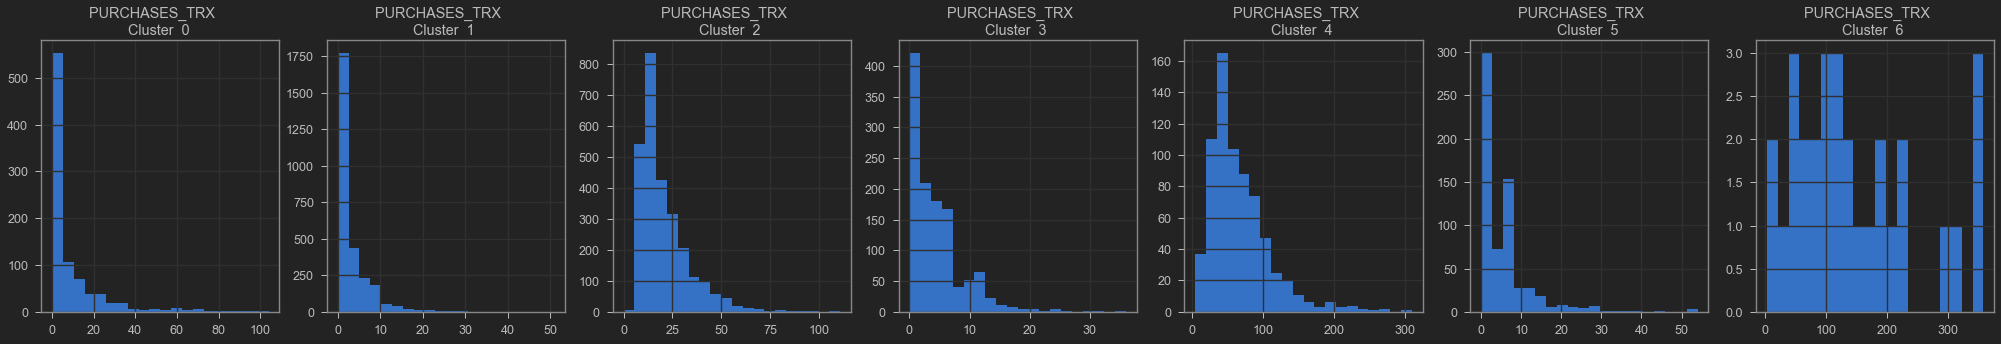

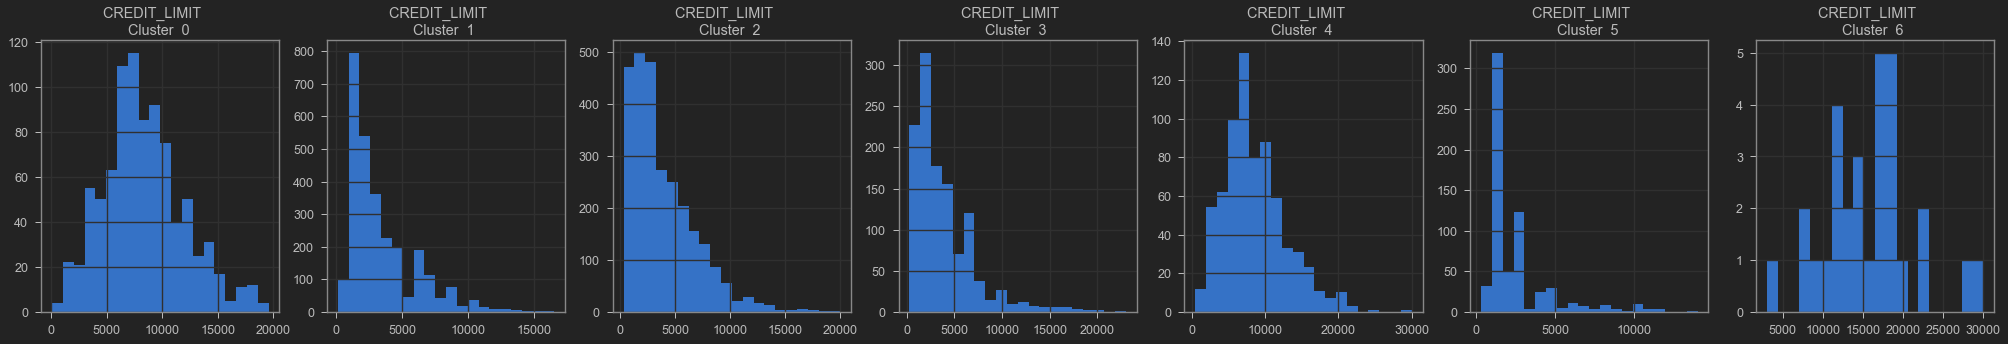

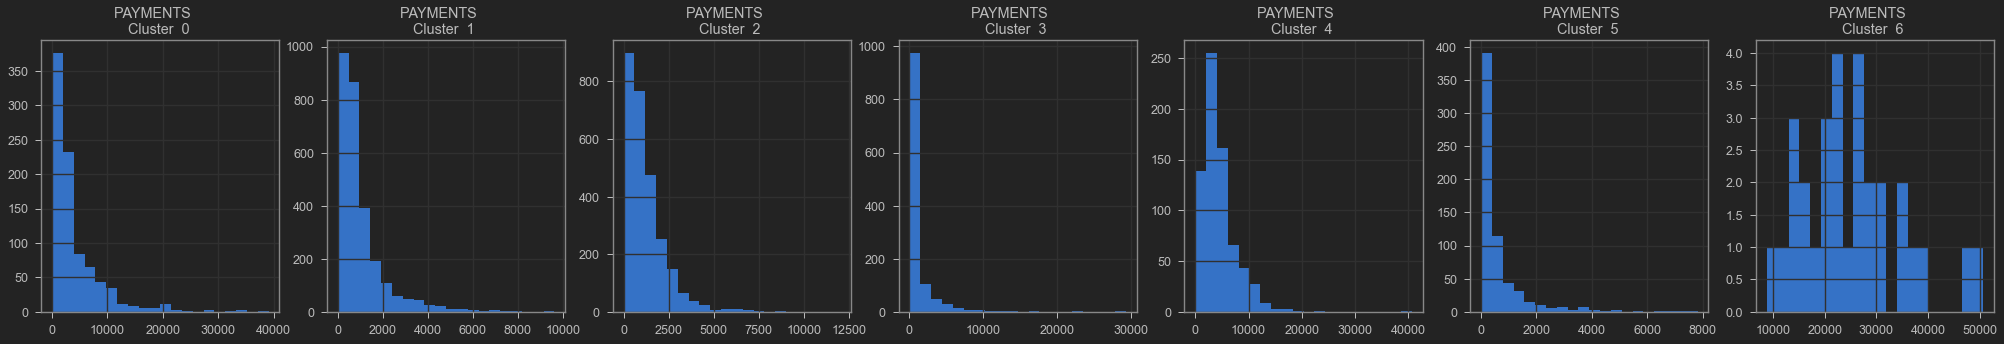

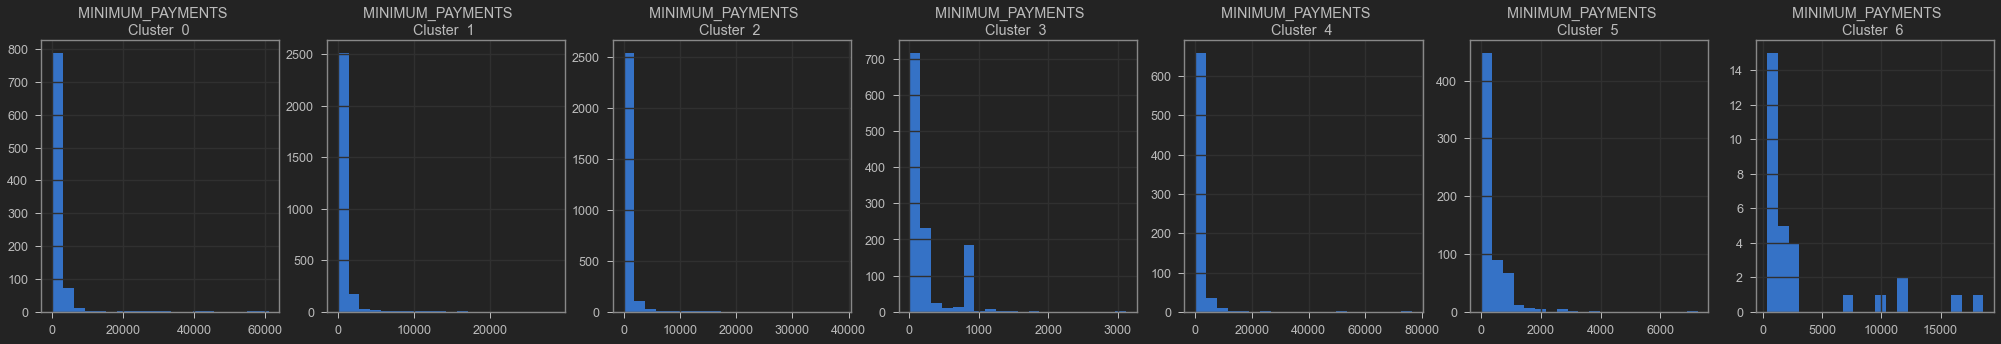

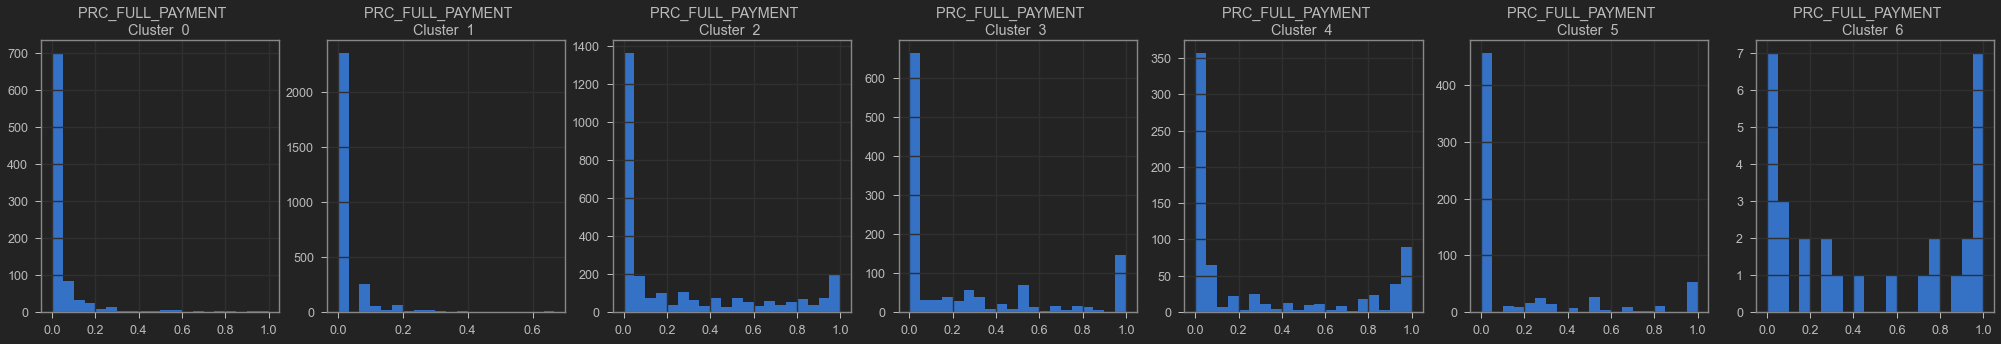

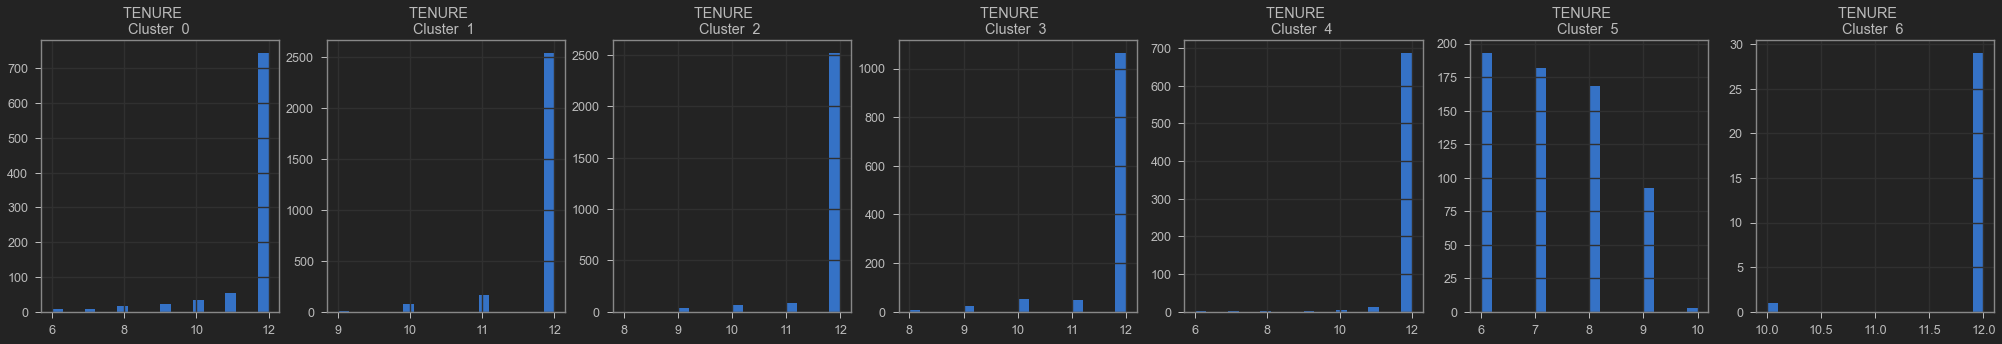

In [26]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=df_cluster[df_cluster['CLUSTER']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster  {} '.format(i,j))
    plt.show()

## Apply principal component analysis (PCA) and visualize the results

In [27]:
pca=PCA(n_components=6)
pca.fit(df_scaled)


PCA(n_components=6)

In [28]:
scores=pca.transform(df_scaled)

In [29]:
scores_df=pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
scores_df

PC1       PC2       PC3       PC4       PC5       PC6
0    -1.682220 -1.076451  0.488507  0.665552  0.018225  0.050629
1    -1.138295  2.506477  0.601212 -0.120437  0.605803 -1.136841
2     0.969684 -0.383520  0.102371  1.209266 -2.172584 -0.217222
3    -0.873628  0.043166  1.460167  1.151980  0.295632 -0.123689
4    -1.599434 -0.688581  0.365094  0.990232 -0.487039  0.075060
...        ...       ...       ...       ...       ...       ...
8945 -0.359629 -2.016145 -0.995355 -2.727433  0.268860  2.673305
8946 -0.564369 -1.639123 -1.290238 -1.860551  0.187104  3.384215
8947 -0.926204 -1.810786 -0.474723 -2.280239  0.386553  2.976948
8948 -2.336552 -0.657966  0.974725 -1.861279  0.069779  3.174380
8949 -0.556422 -0.400467  1.015196 -1.953237 -1.243000  3.753291

[8950 rows x 6 columns]

#### Explained variance

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.27290037, 0.20301991, 0.08791979, 0.07479975, 0.06262792,
       0.05750211])

In [31]:
explained_variance=np.insert(explained_variance,0,0)

#### Preparing the cumulative variance data

In [32]:
cumulative_variance=np.cumsum(np.round(explained_variance,decimals=2))

#### Combining the dataframe

In [33]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6'], columns=['PC'])
explained_variance_df=pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df=pd.DataFrame(cumulative_variance, columns=['Cumulative Varaince'])

### 6 principal components explain 75% of the variance

In [34]:
df_explained_variance=pd.concat([pc_df,explained_variance_df,cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Varaince
0                 0.000000                 0.00
1  PC1            0.272900                 0.27
2  PC2            0.203020                 0.47
3  PC3            0.087920                 0.56
4  PC4            0.074800                 0.63
5  PC5            0.062628                 0.69
6  PC6            0.057502                 0.75

### Making the scree plot

In [35]:
import plotly.express as px

In [36]:
fig=px.bar(df_explained_variance,x='PC', y='Explained Variance', text='Explained Variance', width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

### Choosing PC1 and PC2 as the main principal components to show the visualization in a plane

In [37]:
pca_df=pd.DataFrame(data=scores_df,columns=['PC1','PC2'])
pca_df.head()                                

PC1       PC2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581

In [38]:
pca_df=pd.concat([pca_df,pd.DataFrame({'CLUSTER':labels})],axis=1)
pca_df.head()

PC1       PC2  CLUSTER
0 -1.682220 -1.076451        1
1 -1.138295  2.506477        0
2  0.969684 -0.383520        2
3 -0.873628  0.043166        1
4 -1.599434 -0.688581        1

<function matplotlib.pyplot.show(close=None, block=None)>

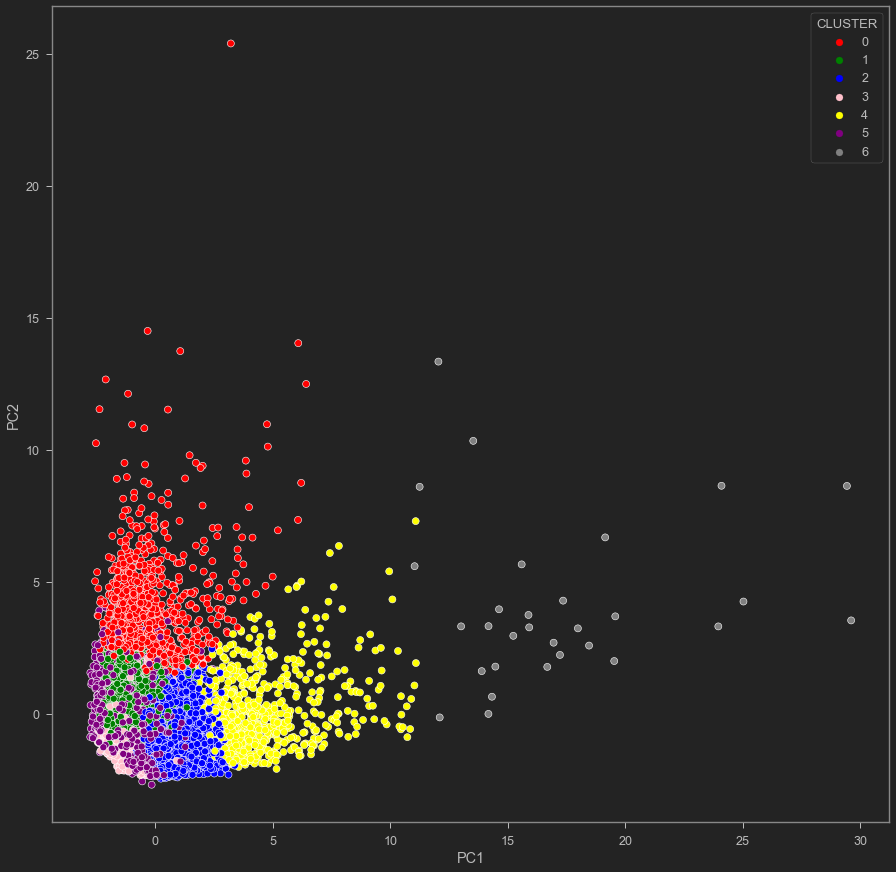

In [39]:
plt.figure(figsize=(15,15))
ax=sns.scatterplot(x="PC1",y="PC2",hue="CLUSTER", data=pca_df,palette=['red','green','blue','pink','yellow','purple','gray'])
plt.show

In [44]:
sav_df = pd.concat([scores_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
sav_df.head()

array([1, 0, 2, 4, 3, 5, 6])

In [57]:
import os
from pathlib import Path
import pickle
pickle.dump(sav_df, open(Path().resolve().parent.joinpath('app').joinpath('pca.sav'), 'wb'))